In [25]:
# Import necessary packages to read, process and visualize data
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt     # Generate plots
import seaborn as sns               # Visualization
%matplotlib inline

# Read the data
filename = "Telco-Customer-Churn.csv"
data = pd.read_csv(filename)

# Let us see the shape of data
print(data.shape)   
# Following output shows there are 7043 rows and 21 columns in our data

(7043, 21)


In [26]:
# Overview and statistical details of the data..
# Let us see first five rows to understand what type of values exist for each columns
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


From above we can see there are mostly categorical features in the data. 
However, it is better to obtain exact information about each column.

In [27]:
# To view all column names and their respective data types
data.columns
data.info()
data.describe() # Shows statistical summaries for all numeric columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


([<matplotlib.patches.Wedge at 0x263f1ccf170>,
 [Text(-0.7393678277834757, 0.8144539368428056, 'No'),
  Text(0.7393677515287918, -0.8144540060674139, 'Yes')],
 [Text(-0.4032915424273503, 0.44424760191425755, '73.5%'),
  Text(0.4032915008338864, -0.4442476396731348, '26.5%')])

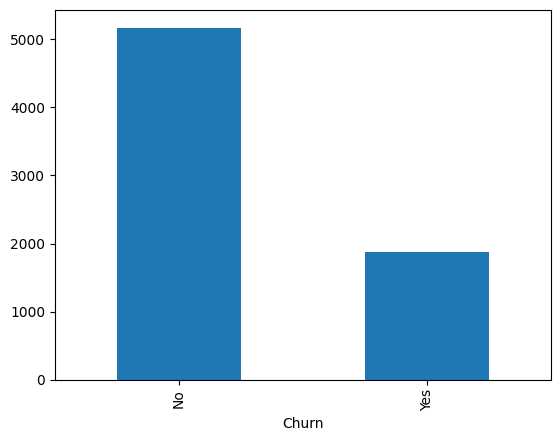

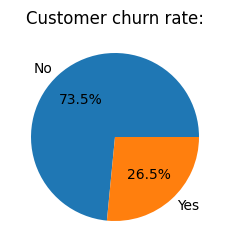

In [28]:
# Plot distribution of dependent/target variable - Churn column
data['Churn'].value_counts().head().plot.bar()   # To generate a bar plot

# To generate a pie chart. Since there are only two classes, a pie chart may look more appealing
sizes = data['Churn'].value_counts(sort = True)
labels = np.unique(data.Churn)

# Visualize the data
plt.figure(figsize = (6,6))
plt.subplot(212)
plt.title("Customer churn rate:")
plt.pie(sizes, labels = labels, autopct='%1.1f%%')

# Bar & pie plots below show that number of customers churned is less than half of not churned.

In [29]:
# Convert following object type columns to numeric        
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors = 'coerce')

In [30]:
# Let us find if there are any missing values in our data.
print("No. of missing values: \n",data.isnull().sum())

No. of missing values: 
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


Output shows that there are 11 total missing values in TotalCharges column.

In [31]:
# Drop CustomerId column as it is not required
data.drop(['customerID'], axis = 1, inplace = True)

# Fill the missing values with 0
data['TotalCharges'] = data['TotalCharges'].fillna(0.0)

# Check for any existing missing values
print("Missing values now: \n", data.isnull().sum())

Missing values now: 
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Missing values for all columns are now 0. So, no more missing data.

In [32]:
# Now let us work on categorical features. 
data.gender = [1 if x == "Male" else 0 for x in data.gender]
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines','Churn'):
    data[col] = [1 if x == "Yes" else 0 for x in data[col]]        
data.head(10)   #

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,1,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,1,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,0,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,1,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,0,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


Now, let us see which features are most effective in causing customer churn.
**Correlation -**
Correlation between variables shows how dependent variable changes due to an independent variable under consideration. 
A value close to +1 signifies strong positive correlation, while close to -1 shows strong negative effect. Correlation coeff. close to zero signifies weak relation between features. 

In [34]:
# Print correlation between all features and target variable
data = data.drop(['InternetService', 'Contract', 'PaymentMethod'], axis=1)

data.corr()['Churn'].sort_values()

tenure             -0.352229
TotalCharges       -0.198324
OnlineSecurity     -0.171226
TechSupport        -0.164674
Dependents         -0.164221
Partner            -0.150448
OnlineBackup       -0.082255
DeviceProtection   -0.066160
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.040102
StreamingMovies     0.061382
StreamingTV         0.063228
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<Axes: >

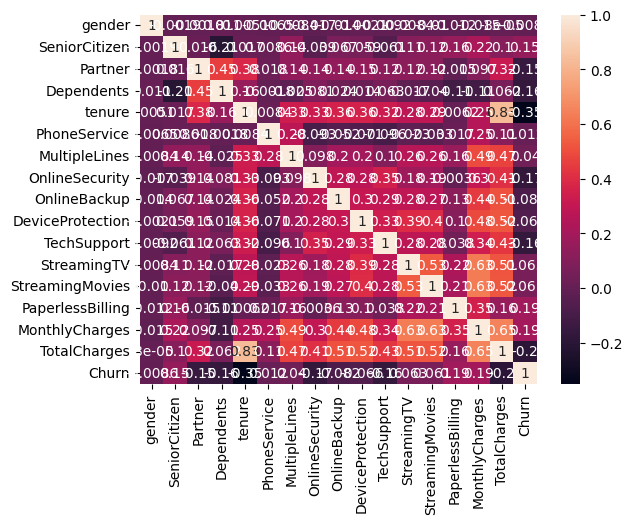

In [35]:
# Plot heatmap using Seaborn to visualize correlation amongst ftrs.
sns.heatmap(data.corr(), annot = True)

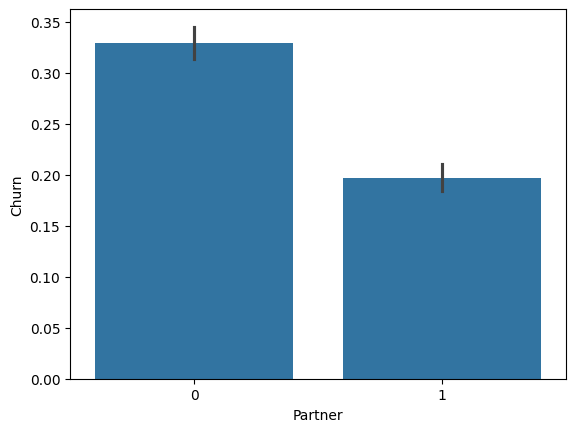

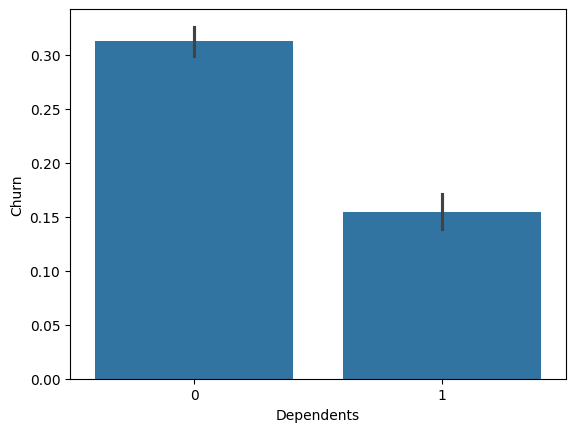

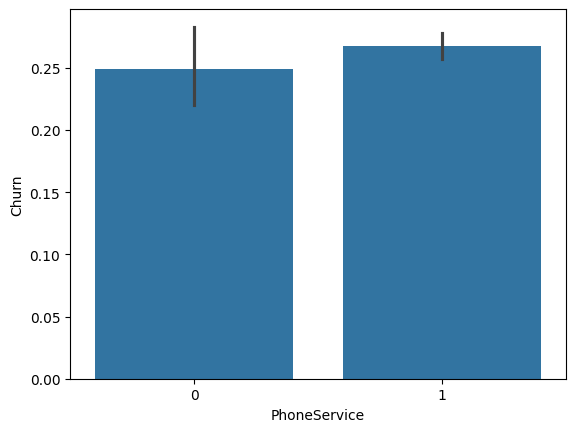

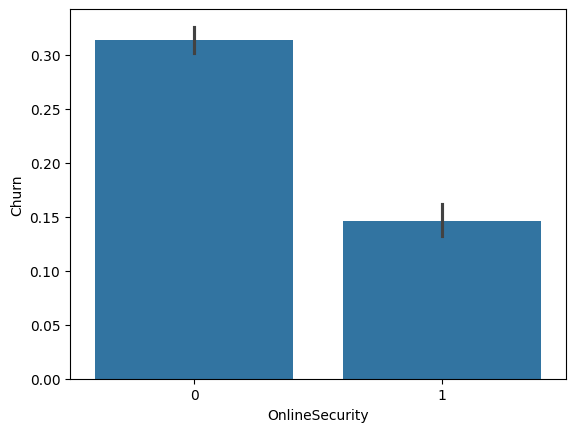

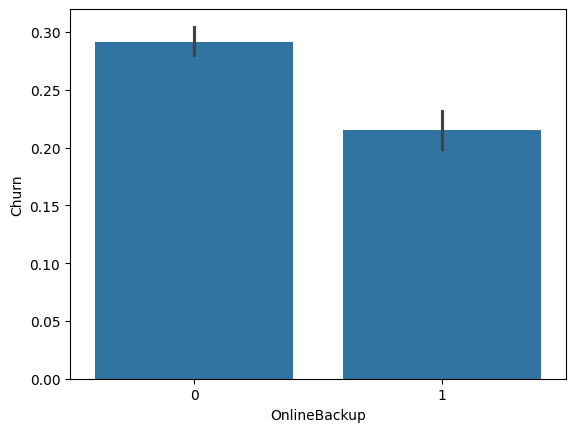

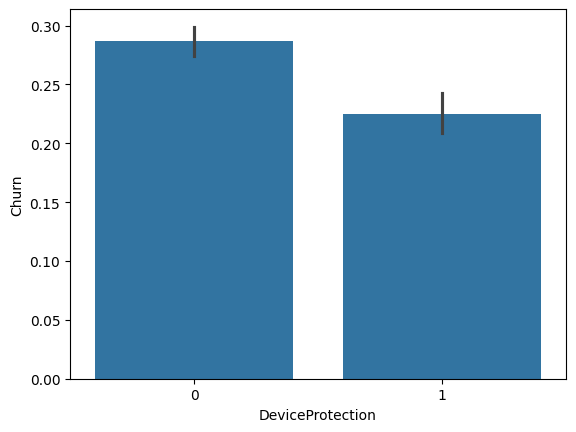

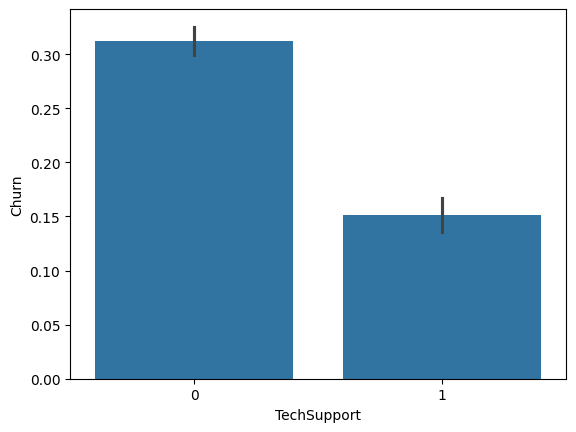

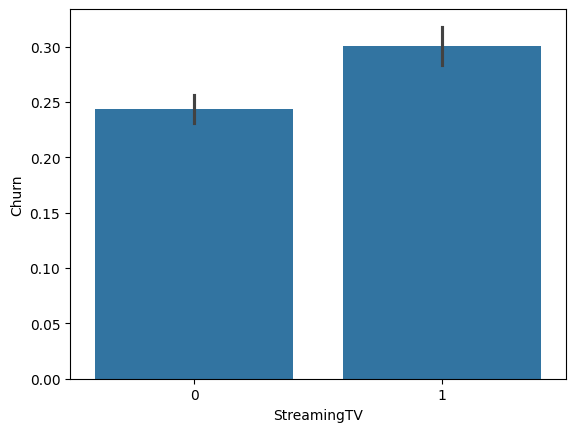

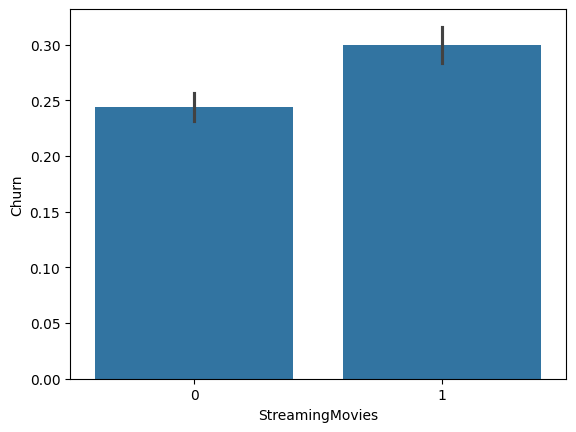

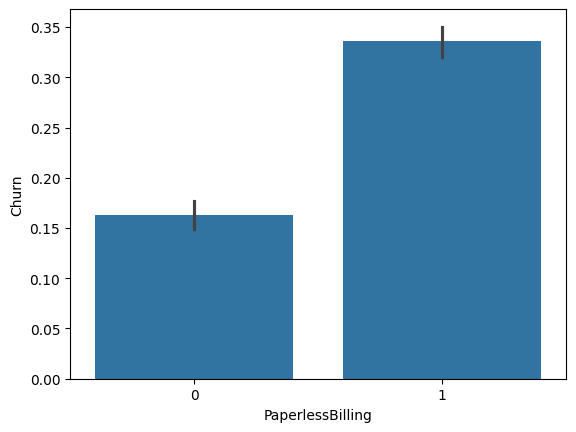

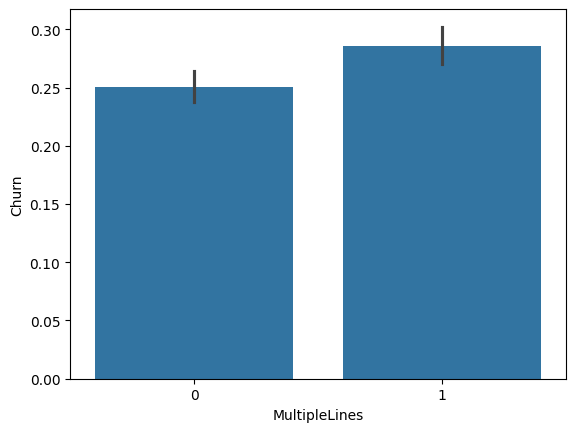

In [36]:
# For following features, let us generate bar plots w.r.t. target variable
for col in ('Partner', 'Dependents', 'PhoneService' , 'OnlineSecurity',
        'OnlineBackup','DeviceProtection', 'TechSupport','StreamingTV',
        'StreamingMovies','PaperlessBilling','MultipleLines'):
    sns.barplot(x = col, y = 'Churn', data = data)
    plt.show()
# Following plots show Churn rate for each category of these categorical features.    

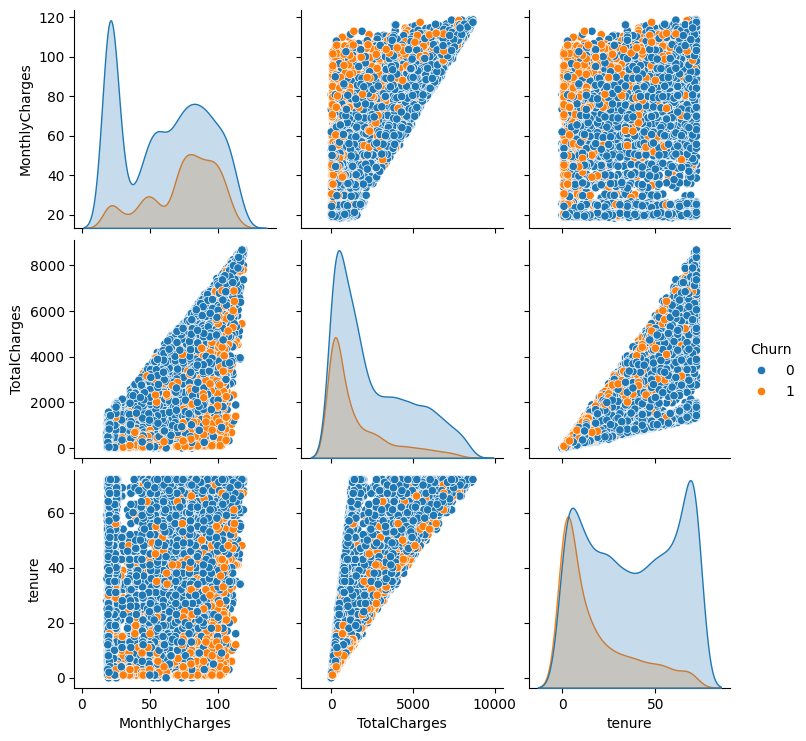

In [37]:

highCorrCols = ['MonthlyCharges','TotalCharges','tenure', 'Churn']
sns.pairplot(data[highCorrCols], hue = 'Churn')

In [40]:
# Prepare data for model training and testing input.
y = data.Churn.values     # Target feature

# All features except class (target)
data = pd.get_dummies(data)
X = data.drop(["Churn"],axis=1)

from sklearn.metrics import accuracy_score, mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.linear_model import LogisticRegression as LR
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier

# Split the data into training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.2, random_state=1)

# Classification using RBF SVM  
svc_rbf = SVC(kernel = "rbf")
svc_rbf = svc_rbf.fit(X_train,y_train)
prediction = svc_rbf.predict(X_test)
print("Mean-squared error using SVM RBF:", mse(y_test, prediction))
print("Accuracy with SVM RBF:",accuracy_score(y_test, prediction))

# Classification using Random Forest Classifier
rfc = RF(max_depth= 5, n_estimators= 10, max_features= 'sqrt')
rfc = rfc.fit(X_train,y_train)
prediction = rfc.predict(X_test)
print("Mean-squared error using Random Forest Classifier:", mse(y_test, prediction))
print("Accuracy with Random Forest Classifier:",accuracy_score(y_test, prediction))

# Classification using Logistic Regression
logreg = LR(C = 1)
logreg = logreg.fit(X_train,y_train)
prediction = logreg.predict(X_test)
print("Mean-squared error using Logistic Regression:", mse(y_test, prediction))
print("Accuracy with Logistic Regression:",accuracy_score(y_test, prediction))

# Classification using Multi-layer perceptron 
ann = MLPClassifier(solver='lbfgs', alpha = 1e-5,
                    hidden_layer_sizes = (5, 2), random_state = 1)
ann = ann.fit(X_train, y_train)
prediction = ann.predict(X_test)
print("Mean-squared error using Neural networks MLP:", mse(y_test, prediction))
print("Accuracy with Neural networks MLP:",accuracy_score(y_test, prediction))

Mean-squared error using SVM RBF: 0.24698367636621718
Accuracy with SVM RBF: 0.7530163236337828
Mean-squared error using Random Forest Classifier: 0.19446415897799857
Accuracy with Random Forest Classifier: 0.8055358410220014


c:\Users\Utkarsha Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean-squared error using Logistic Regression: 0.1937544357700497
Accuracy with Logistic Regression: 0.8062455642299503
Mean-squared error using Neural networks MLP: 0.19730305180979418
Accuracy with Neural networks MLP: 0.8026969481902059


c:\Users\Utkarsha Gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [41]:
import joblib

# Save the trained model
joblib.dump(rfc, "random_forest_model.pkl")

# Load the model later when needed
loaded_model = joblib.load("random_forest_model.pkl")

# Use the loaded model for predictions
prediction = loaded_model.predict(X_test)


This is my first kernel at Kaggle. I will keep on working to improve this and my future kernels. 
Please feel free to provide any advice or suggestions and I would try to make changes accordingly.



**Happy learning and thank you!**